<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2024/blob/main/Seminars/Solutions/S2s_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные алгоритмы ML

### Семинар 2: Основные понятия и простейшие модели машинного обучения

#### Учимся на геномных эмбеддингах. Работа с веществами в Python. Классификация веществ и проблемы разбиения их на обучение и тест.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

### Задача 1: Предсказание рака молочной железы

В этой задаче предлагается произвести предсказание рака молочной железы на известном <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">датасете</a> UCI ML Breast Cancer Wisconsin (Diagnostic) dataset.

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Датасет загружен за вас, определены `X` и `y`.

In [ ]:
X = data['data']
y = data['target']

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 4:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=777)

**Осуществите стандартизацию признаков в выборке**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

**Импортируйте модель классификации k-NN и обучите ее (`model.fit`)**.\
*Вопрос*: на какой части выборки происходит обучение: тренировочной или тестовой?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками бинарной классификации: precision, recall, F1-score.

In [ ]:
X_test_scaled = scaler.transform(X_test)
y_test_pred = knn.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.95
Recall: 1.00
F1-score: 0.97


Следующая функция строит график зависимости качества на тестовой и тренировочной выборках от параметра модели.\
Измените помеченную строку в функции так, чтобы ее можно было использовать **для построения графика зависимости качества от количества соседей для модели k-NN**.

In [ ]:
from sklearn.metrics import f1_score

def make_qual_chart(X_train, X_test, y_train, y_test, metric=f1_score, limit=50):
    train_quals = np.zeros(limit)
    test_quals = np.zeros(limit)
    param_range = np.arange(1, limit + 1)

    for ind, value in enumerate(param_range):
        ### CHANGE THE NEXT LINE!
        model = KNeighborsClassifier(n_neighbors=value)
        # FIT
        model.fit(X_train, y_train)
        # PREDICT
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        # EVALUATE QUALITY
        train_quals[ind] = metric(y_true=y_train, y_pred=y_train_pred)
        test_quals[ind] = metric(y_true=y_test, y_pred=y_test_pred)



    # TRACING CHART
    plt.figure(figsize=(10, 7))
    plt.plot(param_range, train_quals, label="Train")
    plt.plot(param_range, test_quals, label="Test")

    plt.legend()
    plt.show()
    return param_range, train_quals, test_quals

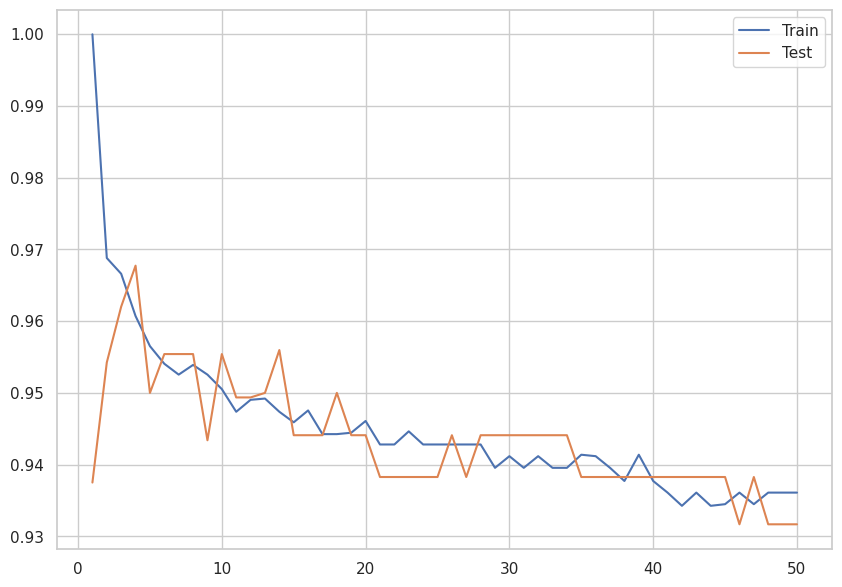

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 array([1.        , 0.96880734, 0.96660808, 0.96071429, 0.95652174,
        0.9540636 , 0.95254833, 0.95390071, 0.95254833, 0.95053004,
        0.94736842, 0.94903339, 0.94921191, 0.94736842, 0.94589878,
        0.94755245, 0.94425087, 0.94425087, 0.94444444, 0.94608696,
        0.94280763, 0.94280763, 0.94463668, 0.94280763, 0.94280763,
        0.94280763, 0.94280763, 0.94280763, 0.93955095, 0.94117647,
        0.93955095, 0.94117647, 0.93955095, 0.93955095, 0.94137931,
        0.94117647, 0.93955095, 0.93771626, 0.94137931, 0.93771626,
        0.93609672, 0.93425606, 0.93609672, 0.93425606, 0.93448276,
        0.93609672, 0.93448276, 0.93609672, 0.93609672, 0.93609672]),
 array([0.9375    , 0.95424837, 0.96202532, 0.96774194, 0.95      ,
        0.95541401, 0.95

In [ ]:
make_qual_chart(X_train, X_test, y_train, y_test)

Сделайте вывод о том, **какое число соседей является оптимальным для данной задачи**.

### Задача 2: Обучение на геномных эмбеддингах

В этой задаче предлагается произвести трехклассовую классификацию разных однонуклеотидных замен в ДНК, основываясь на их нейросетевых геномных эмбеддингах.

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RDTcTnhOcMX4DnJbzdPalWENNFtXi2r8' -O tfs_deepsea.csv

--2024-11-12 13:10:03--  https://docs.google.com/uc?export=download&id=1RDTcTnhOcMX4DnJbzdPalWENNFtXi2r8
Resolving docs.google.com (docs.google.com)... 172.253.62.101, 172.253.62.113, 172.253.62.138, ...
Connecting to docs.google.com (docs.google.com)|172.253.62.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1RDTcTnhOcMX4DnJbzdPalWENNFtXi2r8&export=download [following]
--2024-11-12 13:10:03--  https://drive.usercontent.google.com/download?id=1RDTcTnhOcMX4DnJbzdPalWENNFtXi2r8&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1098058 (1.0M) [application/octet-stream]
Saving to: ‘tfs_deepsea.csv’

tfs_deepsea.csv     100%[===================>]   1.05M  --.-KB/s    

Загрузите датасет `tfs_deepsea.csv`, в качестве `y` используйте колонку `Direction`, в качестве `X` - все колонки, начиная с девятой.

In [ ]:
tfs = pd.read_csv("tfs_deepsea.csv", header=0)
tfs.head(3)

,Chrom,Pos,Ref,Alt,Value,Confidence,Direction,construction,alt@BRCA1@ds_HepG2_normal,alt@CTCF@ds_HCM_normal,...,ref@GATA3@ds_MCF-7_normal,ref@JunD@ds_H1-hESC_None.1,ref@MafK@ds_K562_normal,ref@NRSF@ds_A549_EtOH_0.02pct,ref@Pol2-4H8@ds_GM12891_normal,ref@Pol2@ds_GM12878_None.2,ref@Pol2@ds_GM12878_None.3,ref@Pol2@ds_GM12878_normal,ref@c-Fos@ds_K562_normal,ref@c-Myc@ds_K562_normal
0,9,104195582,G,C,-0.009418,0.001075,0,ALDOB,0.000056,0.000949,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
1,9,104195582,G,T,-0.212088,0.034187,0,ALDOB,0.000051,0.000857,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
2,9,104195700,T,A,0.709840,0.364072,1,ALDOB,0.000089,0.001784,...,0.00292,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891


In [ ]:
tfs['construction'].value_counts()

,count
construction,
ALDOB,500
ECR11,500


In [ ]:
# Колонка Direction - предсказываемые классы (0, 1, 2).

In [ ]:
X = tfs.iloc[:, 8:]
y = tfs["Direction"]

In [ ]:
y.value_counts()

,count
Direction,
0,836
-1,121
1,43


In [ ]:
X.head()

,alt@BRCA1@ds_HepG2_normal,alt@CTCF@ds_HCM_normal,alt@DNase@ds_GM06990_normal,alt@DNase@ds_HRE_normal,alt@ELF1@ds_GM12878_normal,alt@GATA-1@ds_PBDE_normal,alt@GR@ds_A549_DEX_500pM,alt@H3K4me3@ds_NHDF-Ad_normal,alt@H3K9me3@ds_NHLF_normal,alt@NRSF@ds_H1-hESC_normal,...,ref@GATA3@ds_MCF-7_normal,ref@JunD@ds_H1-hESC_None.1,ref@MafK@ds_K562_normal,ref@NRSF@ds_A549_EtOH_0.02pct,ref@Pol2-4H8@ds_GM12891_normal,ref@Pol2@ds_GM12878_None.2,ref@Pol2@ds_GM12878_None.3,ref@Pol2@ds_GM12878_normal,ref@c-Fos@ds_K562_normal,ref@c-Myc@ds_K562_normal
0,0.000056,0.000949,0.005588,0.032168,0.000060,0.006015,0.000959,0.002953,0.000253,0.000443,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
1,0.000051,0.000857,0.006543,0.027380,0.000060,0.005420,0.000793,0.002678,0.000259,0.000400,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
2,0.000089,0.001784,0.008986,0.161180,0.000086,0.004401,0.001779,0.008086,0.001602,0.001637,...,0.00292,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891
3,0.000091,0.001538,0.008108,0.118170,0.000090,0.004464,0.001636,0.008273,0.001479,0.001845,...,0.00292,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891
4,0.000103,0.001784,0.008564,0.156840,0.000102,0.004632,0.002136,0.009151,0.001432,0.001930,...,0.00292,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891


In [ ]:
y.head()

,Direction
0,0
1,0
2,1
3,0
4,0


**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 4:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=777)

**Осуществите стандартизацию признаков в выборке**.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

**Импортируйте модель классификации k-NN и обучите ее (`model.fit`)**.

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками из отчета о классификации (`classification_report`).

In [ ]:
X_test_scaled = scaler.transform(X_test)
y_test_pred = knn.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          -1       0.77      0.72      0.74        32
           0       0.91      0.96      0.93       161
           1       0.00      0.00      0.00         7

    accuracy                           0.89       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.85      0.89      0.87       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Разбейте X и y на тренировочную и тестовую выборки, **так, как указано в ячейке ниже**. Повторите все шаги, чтобы определить качество классификации.

In [ ]:
X_train = X[tfs["construction"] == "ECR11"].values
X_test = X[tfs["construction"] == "ALDOB"].values
y_train = y[tfs["construction"] == "ECR11"].values
y_test = y[tfs["construction"] == "ALDOB"].values

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

y_test_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          -1       0.26      0.35      0.30        94
           0       0.80      0.76      0.78       382
           1       0.50      0.17      0.25        24

    accuracy                           0.66       500
   macro avg       0.52      0.43      0.44       500
weighted avg       0.68      0.66      0.66       500



**Сделайте выводы об изменении качества**.

In [ ]:
# В первом случае когда разбивали на test и train случайно, мы дали модели посмотреть на оба генетических конструкта.
# Во втором случае мы обучили модель лишь на одном конструкте, и предсказали второй. Поэтому точность сильно упала.
# Но зато мы получили оценку того, как модель будет предсказывать конструкты, которые мы не рассматривали.

### Задача 3: Классификация химических веществ

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7' -O bace.csv

--2024-11-12 08:14:39--  https://docs.google.com/uc?export=download&id=1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7
Resolving docs.google.com (docs.google.com)... 74.125.141.113, 74.125.141.138, 74.125.141.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.141.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7&export=download [following]
--2024-11-12 08:14:39--  https://drive.usercontent.google.com/download?id=1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.11.132, 2607:f8b0:400c:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.11.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3897767 (3.7M) [application/octet-stream]
Saving to: ‘bace.csv’

bace.csv            100%[===================>]   3.72M  22.0MB/s    in 0.2s

Датасет [BACE](http://moleculenet.ai/datasets-1) загружен за вас, определены `X`, `y` и `smiles`.

In [ ]:
bace = pd.read_csv("./bace.csv", header=0)
bace.tail(3)

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545,0,Test,2.953115,320.18451,3.0895,2,1,2,...,47.790600,22.563574,96.290794,58.798935,20.071724,9.368159,0.00000,6.904104,0.0,1545
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546,0,Test,2.733298,317.38440,3.8595,2,1,3,...,77.219978,9.316234,95.907784,112.609720,20.071724,9.368159,0.00000,6.904104,0.0,1546
1512,Clc1cc2nc(n(c2cc1)CCCC(=O)NCC1CC1)N,BACE_1547,0,Test,2.544546,306.79059,3.4271,2,2,6,...,26.907076,37.681076,161.450780,40.882919,30.107586,9.368159,7.98017,0.000000,0.0,1547


In [ ]:
X = bace.iloc[:,4:].values
y = bace["Class"].values
smiles = bace["mol"].values

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 3:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=777)

**Осуществите стандартизацию признаков в выборке**.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

**Импортируйте модель kNN обучите ее на соответствующей части выборки (`model.fit`)**.

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками из отчета о классификации (`classification_report`).

In [ ]:
X_test_scaled = scaler.transform(X_test)
y_test_pred = knn.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       212
           1       0.80      0.87      0.83       167

    accuracy                           0.85       379
   macro avg       0.85      0.85      0.85       379
weighted avg       0.85      0.85      0.85       379



Функция `fingerprint_train_test_split`, приведенная ниже, осуществляет **разбиение train/test на основании молекулярных "отпечатков" (molecular fingerprints)**. Воспользуйтесь ей, чтобы получить **неслучайное разбиение на train/test** и повторите предыдущие шаги, чтобы оценить качество модели на таком случае.

In [ ]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 58.7 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [ ]:
def _split_fingerprints(fps, size1, size2):
    """This is called by fingerprint_train_test_split to divide a list of fingerprints into
    two groups.
    """
    assert len(fps) == size1 + size2

    # Begin by assigning the first molecule to the first group.

    fp_in_group = [[fps[0]], []]
    indices_in_group = ([0], [])
    remaining_fp = fps[1:]
    remaining_indices = list(range(1, len(fps)))
    max_similarity_to_group = [
        DataStructs.BulkTanimotoSimilarity(fps[0], remaining_fp),
        [0] * len(remaining_fp)
    ]
    while len(remaining_fp) > 0:
    # Decide which group to assign a molecule to.
        group = 0 if len(fp_in_group[0]) / size1 <= len(
            fp_in_group[1]) / size2 else 1

        # Identify the unassigned molecule that is least similar to everything in
        # the other group.

        i = np.argmin(max_similarity_to_group[1 - group])

        # Add it to the group.

        fp = remaining_fp[i]
        fp_in_group[group].append(fp)
        indices_in_group[group].append(remaining_indices[i])

        # Update the data on unassigned molecules.

        similarity = DataStructs.BulkTanimotoSimilarity(fp, remaining_fp)
        max_similarity_to_group[group] = np.delete(
            np.maximum(similarity, max_similarity_to_group[group]), i)
        max_similarity_to_group[1 - group] = np.delete(
            max_similarity_to_group[1 - group], i)
        del remaining_fp[i]
        del remaining_indices[i]
    return indices_in_group

In [ ]:
def fingerprint_train_test_split(X, y, smiles, test_size=0.1):
    assert X.shape[0] == y.shape[0] == smiles.shape[0]
    mols = [Chem.MolFromSmiles(s) for s in smiles]
    fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, 1024) for x in mols]

    # Split into two groups: training set and everything else.

    test_size = int(test_size * len(y))
    train_size = len(y) - test_size
    train_inds, test_inds = _split_fingerprints(fps, train_size, test_size)

    X_train = X[train_inds,:]
    X_test = X[test_inds,:]
    y_train = y[train_inds]
    y_test = y[test_inds]

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = fingerprint_train_test_split(X, y, smiles)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(10)
knn.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_test_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79        91
           1       0.74      0.43      0.55        60

    accuracy                           0.72       151
   macro avg       0.72      0.67      0.67       151
weighted avg       0.72      0.72      0.69       151



**Сделайте выводы**.

In [ ]:
# мы чуть более генерализовали нашу модель, обучив ее на молекулах, сильно отличающихся по фингерпринту от тестовых
# очевидно, однако, что за это мы поплатились качеством

---